In [6]:
import numpy as np
import urllib
import cv2

def image_url_to_array(url, width=28, height=28):
# check for possible errors (e.g. 404)
    try:
        # request the image and convert to a numpy array
        res = urllib.request.urlopen(url)
        img = np.asarray(bytearray(res.read()), dtype="uint8")
        img = cv2.imdecode(img, cv2.IMREAD_GRAYSCALE) #IMREAD_COLOR if color is important information
        img = cv2.resize(img, (width, height))
    except:
        img = 'an error occured'
    return img

def bulk_image_url_to_array(url_list, width=28, height=28):
    ndim_array = np.zeros((0, width, height )) #blank, numpy.ndarray template
    for i in url_list:
        try:
            reshape = np.reshape(image_url_to_array(i, width, height), (1,width ,height)) #reshape each individual image to match the template
            ndim_array = np.append(ndim_array, reshape, axis=0)
        except:
            pass 
    ndim_array = ndim_array.astype(np.uint8) #convert to type uint8
    return ndim_array

In [19]:
sample_url_list = ["https://i.pinimg.com/originals/a4/90/47/a49047d73e5644961b123aa48790d5c8.jpg",
                  "https://www.sciencemag.org/sites/default/files/styles/article_main_large/public/cc_iStock-478639870_16x9.jpg?itok=1-jMc4Xv",
                  "https://lithub.com/wp-content/uploads/2019/09/octopus-1.jpg"]

image_arrays = bulk_image_url_to_array(sample_url_list, 250, 250)
image_arrays.shape

(3, 250, 250)

### Save Arrays to file
For faster loading in later sessions. Credit for this solution belongs [here](https://stackoverflow.com/questions/3685265/how-to-write-a-multidimensional-array-to-a-text-file).

In [17]:
with open('savefile.txt', 'w') as outfile:
    outfile.write('# Array shape: {0}\n'.format(image_arrays.shape))
    
    for slice in image_arrays:
        np.savetxt(outfile, slice, fmt='%-7.2f')
        outfile.write('# New slice\n')

### Read Arrays from file

In [20]:
image_arrays_fromfile= np.loadtxt('savefile.txt').reshape((3, 250, 250)) #initially reads as 2d, so
#reshape by referencing original shape of array before writing
assert np.all(image_arrays_fromfile == image_arrays) #verify they're the same

(3, 250, 250)


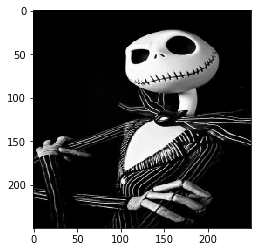

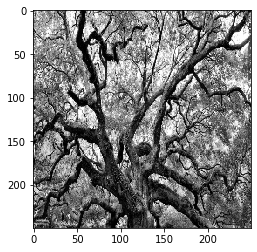

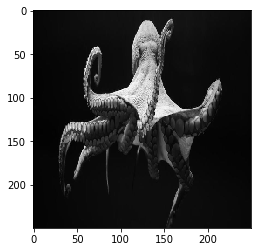

In [26]:
import matplotlib.pyplot as plt
print(image_arrays_fromfile.shape)
for i in image_arrays_fromfile:
    plt.imshow(i, cmap = 'gray')
    plt.show()

### FYI
If saving image arrays to a file, ensure the labels are accounted for. The common scenario is a dataframe with labels as one column and image url as another. Since some of the urls may not be valid, they will not be stored as an arry but their label will still exist in the dataframe.

Make sure to add a flag in the dataframe which identifies any images that were *not* converted to arrays so that the amount of image arrays and labels are equivalent and have the correct mapping.